<a href="https://colab.research.google.com/github/suprabhathk/FoundationalModels_TimeSeries_Epidemics/blob/main/TabPFN_FoundationModels_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference demo for TabPFN - [TabPFN_Demo](https://colab.research.google.com/github/liam-sbhoo/tabpfn-time-series/blob/main/demo.ipynb#scrollTo=_EJU0ILwHS_5)

Importing dependencies

In [1]:
!pip install tabpfn-time-series

In [2]:
# for downloading datasets
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## **1. Loading the timeseries dataset from Influcast**

In [3]:
# Importing dependencies for data import
import pandas as pd
import requests
from io import StringIO

In [4]:
def get_last_available_week_data(year):
    """
    Try to get the last available weekly data for a season by checking weeks in reverse order
    """
    base_url = "https://raw.githubusercontent.com/Predizioni-Epidemiologiche-Italia/Influcast/main/sorveglianza/ILI"
    season = f"{year}-{year+1}"

    # Try weeks in reverse order for the second year (most likely to have the final data)
    for week in range(20, 0, -1):  # Try weeks 20 down to 1
        file_name = f"italia-{year+1}_{week:02d}-ILI.csv"
        url = f"{base_url}/{season}/{file_name}"

        try:
            df = pd.read_csv(url)
            print(f"Found data for {season} at week {week} of {year+1}")
            return df
        except:
            continue

    # If not found, try end weeks of first year
    for week in range(53, 39, -1):  # Try weeks 53 down to 40
        file_name = f"italia-{year}_{week:02d}-ILI.csv"
        url = f"{base_url}/{season}/{file_name}"

        try:
            df = pd.read_csv(url)
            print(f"Found data for {season} at week {week} of {year}")
            return df
        except:
            continue

    print(f"No data found for season {season}")
    return None

In [5]:
def get_latest_data(year):
    """Helper function to get latest format data (for 2023 onwards)"""
    base_url = "https://raw.githubusercontent.com/Predizioni-Epidemiologiche-Italia/Influcast/main/sorveglianza/ILI"
    season = f"{year}-{year+1}"
    url = f"{base_url}/{season}/latest/italia-latest-ILI.csv"

    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        print(f"Error importing {season}: {str(e)}")
        return None


In [6]:
def import_flu_data(start_year=2003, end_year=2024):
    """
    Import flu data from GitHub repository:
    - For 2003-2022: Gets last available weekly data
    - For 2023 onwards: Gets latest format data
    """
    all_dfs = []

    # Handle older years (2003-2022)
    for year in range(start_year, 2023):
        print(f"\nProcessing {year}-{year+1} season...")
        df = get_last_available_week_data(year)
        if df is not None:
            print(f"Entries found: {len(df)}")
            all_dfs.append(df)

    # Handle newer years with latest format (2023-2025)
    for year in range(2023, end_year + 1):
        print(f"\nProcessing {year}-{year+1} season (latest format)...")
        df = get_latest_data(year)
        if df is not None:
            print(f"Entries found: {len(df)}")
            all_dfs.append(df)

    # Combine all data
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        print(f"\nFinal dataset shape: {combined_df.shape}")
        return combined_df
    else:
        raise ValueError("No data was successfully imported")

In [7]:
# Import all data
try:
    df_influcast = import_flu_data()
except Exception as e:
    print(f"Error: {str(e)}")


Processing 2003-2004 season...
Found data for 2003-2004 at week 17 of 2004
Entries found: 28

Processing 2004-2005 season...
Found data for 2004-2005 at week 16 of 2005
Entries found: 28

Processing 2005-2006 season...
Found data for 2005-2006 at week 17 of 2006
Entries found: 28

Processing 2006-2007 season...
Found data for 2006-2007 at week 17 of 2007
Entries found: 28

Processing 2007-2008 season...
Found data for 2007-2008 at week 17 of 2008
Entries found: 28

Processing 2008-2009 season...
Found data for 2008-2009 at week 17 of 2009
Entries found: 28

Processing 2009-2010 season...
Found data for 2009-2010 at week 15 of 2010
Entries found: 27

Processing 2010-2011 season...
Found data for 2010-2011 at week 17 of 2011
Entries found: 28

Processing 2011-2012 season...
Found data for 2011-2012 at week 17 of 2012
Entries found: 28

Processing 2012-2013 season...
Found data for 2012-2013 at week 17 of 2013
Entries found: 28

Processing 2013-2014 season...
Found data for 2013-2014 at 

In [8]:
df_influcast

,anno,settimana,incidenza,numero_casi,numero_assistiti,target
0,2003,42,0.360000,357,1000656,ILI
1,2003,43,0.470000,500,1066723,ILI
2,2003,44,0.520000,597,1150866,ILI
3,2003,45,0.600000,723,1204797,ILI
4,2003,46,0.590000,742,1251026,ILI
...,...,...,...,...,...,...
597,2024,52,10.507239,23238,2211618,ILI
598,2025,1,12.355276,27339,2212739,ILI
599,2025,2,14.768421,32995,2234159,ILI
600,2025,3,15.888903,33734,2123117,ILI


In [9]:
# Adding two new columns

# Add new columns
df_influcast['stagione_influenzale'] = df_influcast['anno'].astype(str) + '_' + (df_influcast['anno'] + 1).astype(str)
df_influcast['anno_settimana'] = df_influcast['anno'].astype(str) + '_' + df_influcast['settimana'].astype(str).str.zfill(2)

# Reorder columns
cols = df_influcast.columns.tolist()
# Remove new columns from current position
cols.remove('stagione_influenzale')
cols.remove('anno_settimana')
# Find position of 'settimana' and insert new columns after it
settimana_pos = cols.index('settimana')
cols.insert(settimana_pos + 1, 'stagione_influenzale')
cols.insert(settimana_pos + 2, 'anno_settimana')
# Apply new column order
df_influcast = df_influcast[cols]
df_influcast

,anno,settimana,stagione_influenzale,anno_settimana,incidenza,numero_casi,numero_assistiti,target
0,2003,42,2003_2004,2003_42,0.360000,357,1000656,ILI
1,2003,43,2003_2004,2003_43,0.470000,500,1066723,ILI
2,2003,44,2003_2004,2003_44,0.520000,597,1150866,ILI
3,2003,45,2003_2004,2003_45,0.600000,723,1204797,ILI
4,2003,46,2003_2004,2003_46,0.590000,742,1251026,ILI
...,...,...,...,...,...,...,...,...
597,2024,52,2024_2025,2024_52,10.507239,23238,2211618,ILI
598,2025,1,2025_2026,2025_01,12.355276,27339,2212739,ILI
599,2025,2,2025_2026,2025_02,14.768421,32995,2234159,ILI
600,2025,3,2025_2026,2025_03,15.888903,33734,2123117,ILI


In [25]:
# Create new dataset with years 2020-2022
covid_years_df_influcast = df_influcast[df_influcast['anno'].between(2020, 2022)].copy()

# Keep remaining years in original dataset
without_covid_df_influcast = df_influcast[~df_influcast['anno'].between(2020, 2022)].copy()

# Create dataset with years 2003-2020
df_2003_2019 = df_influcast[df_influcast['anno'].between(2003, 2019)].copy()

# Print shape to verify
print("Dataset shape (2003-2020):", df_2003_2019.shape)

# Print shapes to verify
print("Main dataset shape (excluding 2020-2022):", without_covid_df_influcast.shape)
print("COVID years dataset shape (2020-2022):", covid_years_df_influcast.shape)


Dataset shape (2003-2020): (458, 8)
Main dataset shape (excluding 2020-2022): (518, 8)
COVID years dataset shape (2020-2022): (84, 8)


### **1.1 Converting it into a tabPFN friendly format**

In [26]:
df_ts = df_2003_2019.copy()
df_ts['timestamp'] = pd.to_datetime(df_ts['anno'].astype(str) + '-' + df_ts['settimana'].astype(str) + '-1', format='%Y-%W-%w').dt.to_period('W').dt.to_timestamp()
df_ts = df_ts[['timestamp', 'incidenza']].rename(columns={'incidenza': 'target'})
df_ts['item_id'] = 'ILI'

df_ts

,timestamp,target,item_id
0,2003-10-20,0.36,ILI
1,2003-10-27,0.47,ILI
2,2003-11-03,0.52,ILI
3,2003-11-10,0.60,ILI
4,2003-11-17,0.59,ILI
...,...,...,...
453,2019-12-02,2.39,ILI
454,2019-12-09,3.01,ILI
455,2019-12-16,3.49,ILI
456,2019-12-23,4.20,ILI


In [14]:
!pip install --upgrade gluonts

In [13]:
from autogluon.timeseries import TimeSeriesDataFrame
from tabpfn_time_series.data_preparation import to_gluonts_univariate, generate_test_X


In [12]:
import numpy as np

### ***We adapt generate_test_X based on the kind of prediction_length we are looking at (Weekly, Daily, Monthly or Yearly)***

In [27]:
def generate_test_X(train_tsdf, prediction_length, freq='W'):
    test_dfs = []
    for item_id in train_tsdf.item_ids:
        ground_truth_timestamps = test_tsdf_ground_truth.xs(item_id, level="item_id").index
        test_dfs.append(
            pd.DataFrame({
                "target": np.full(prediction_length, np.nan),
                "timestamp": ground_truth_timestamps[-prediction_length:],
                "item_id": item_id,
            })
        )
    return TimeSeriesDataFrame.from_data_frame(pd.concat(test_dfs))

## 1.2 Building timeseries dataframe for downstream analysis

In [28]:
prediction_length = 100
tsdf = TimeSeriesDataFrame(df_ts)
train_tsdf, test_tsdf_ground_truth = tsdf.train_test_split(prediction_length=prediction_length)
test_tsdf = generate_test_X(train_tsdf, prediction_length)

In [29]:
train_tsdf

target
item_id timestamp         
ILI     2003-10-20    0.36
        2003-10-27    0.47
        2003-11-03    0.52
        2003-11-10    0.60
        2003-11-17    0.59
...                    ...
        2016-02-15    5.90
        2016-02-22    6.14
        2016-02-29    5.88
        2016-03-07    5.83
        2016-03-14    5.00

[358 rows x 1 columns]

In [30]:
test_tsdf

target
item_id timestamp         
ILI     2016-03-21     NaN
        2016-03-28     NaN
        2016-04-04     NaN
        2016-04-11     NaN
        2016-04-18     NaN
...                    ...
        2019-12-02     NaN
        2019-12-09     NaN
        2019-12-16     NaN
        2019-12-23     NaN
        2019-12-30     NaN

[100 rows x 1 columns]

In [31]:
print("Test predictions start date:", test_tsdf.index.get_level_values('timestamp')[0])
print("Test predictions end date:", test_tsdf.index.get_level_values('timestamp')[-1])

Test predictions start date: 2016-03-21 00:00:00
Test predictions end date: 2019-12-30 00:00:00


In [32]:
test_tsdf_ground_truth

target
item_id timestamp         
ILI     2003-10-20    0.36
        2003-10-27    0.47
        2003-11-03    0.52
        2003-11-10    0.60
        2003-11-17    0.59
...                    ...
        2019-12-02    2.39
        2019-12-09    3.01
        2019-12-16    3.49
        2019-12-23    4.20
        2019-12-30    3.92

[458 rows x 1 columns]

Visualising the timeseries

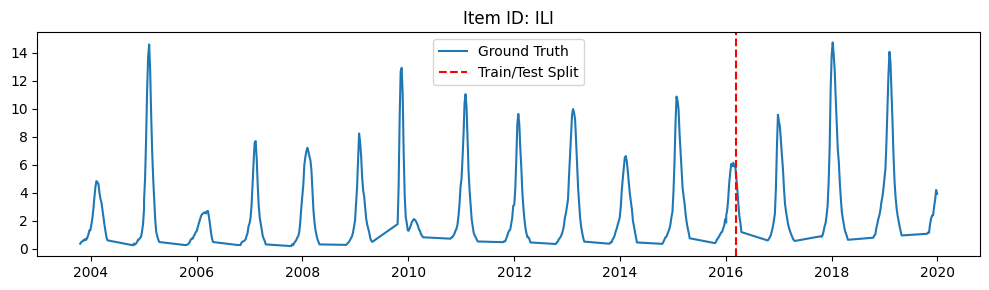

In [33]:
from tabpfn_time_series.plot import plot_actual_ts

plot_actual_ts(train_tsdf, test_tsdf_ground_truth)

## **2. Adding features (sine,cosine)**

In [34]:
from tabpfn_time_series import FeatureTransformer, DefaultFeatures

selected_features = [
    DefaultFeatures.add_running_index,
    DefaultFeatures.add_calendar_features,
]

train_tsdf, test_tsdf = FeatureTransformer.add_features(
    train_tsdf, test_tsdf, selected_features
)


In [35]:
train_tsdf.head()

target  running_index  year  hour_of_day_sin  \
item_id timestamp                                                  
ILI     2003-10-20    0.36              0  2003              0.0   
        2003-10-27    0.47              1  2003              0.0   
        2003-11-03    0.52              2  2003              0.0   
        2003-11-10    0.60              3  2003              0.0   
        2003-11-17    0.59              4  2003              0.0   

                    hour_of_day_cos  day_of_week_sin  day_of_week_cos  \
item_id timestamp                                                       
ILI     2003-10-20              1.0              0.0              1.0   
        2003-10-27              1.0              0.0              1.0   
        2003-11-03              1.0              0.0              1.0   
        2003-11-10              1.0              0.0              1.0   
        2003-11-17              1.0              0.0              1.0   

                    day_of_month_sin  day_of_month_cos  day_of_year_sin  \
item_id timestamp                                                         
ILI     2003-10-20         -0.786552         -0.617525        -0.946699   
        2003-10-27         -0.678312          0.734774        -0.900969   
        2003-11-03          0.413212          0.910635        -0.842101   
        2003-11-10          0.940700         -0.339239        -0.770953   
        2003-11-17         -0.263103         -0.964768        -0.688563   

                    day_of_year_cos  week_of_year_sin  week_of_year_cos  \
item_id timestamp                                                         
ILI     2003-10-20         0.322120         -0.895163          0.445738   
        2003-10-27         0.433884         -0.833602          0.552365   
        2003-11-03         0.539320         -0.759405          0.650618   
        2003-11-10         0.636892         -0.673696          0.739009   
        2003-11-17         0.725176         -0.577774          0.816197   

                    month_of_year_sin  month_of_year_cos  
item_id timestamp                                         
ILI     2003-10-20          -0.909632           0.415415  
        2003-10-27          -0.909632           0.415415  
        2003-11-03          -0.540641           0.841254  
        2003-11-10          -0.540641           0.841254  
        2003-11-17          -0.540641           0.841254

In [36]:
test_tsdf.head()

target  running_index  year  hour_of_day_sin  \
item_id timestamp                                                  
ILI     2016-03-21     NaN            358  2016              0.0   
        2016-03-28     NaN            359  2016              0.0   
        2016-04-04     NaN            360  2016              0.0   
        2016-04-11     NaN            361  2016              0.0   
        2016-04-18     NaN            362  2016              0.0   

                    hour_of_day_cos  day_of_week_sin  day_of_week_cos  \
item_id timestamp                                                       
ILI     2016-03-21              1.0              0.0              1.0   
        2016-03-28              1.0              0.0              1.0   
        2016-04-04              1.0              0.0              1.0   
        2016-04-11              1.0              0.0              1.0   
        2016-04-18              1.0              0.0              1.0   

                    day_of_month_sin  day_of_month_cos  day_of_year_sin  \
item_id timestamp                                                         
ILI     2016-03-21         -0.899312         -0.437307         0.982028   
        2016-03-28         -0.507666          0.861554         0.997617   
        2016-04-04          0.596367          0.802712         0.998659   
        2016-04-11          0.847734         -0.530421         0.985139   
        2016-04-18         -0.461093         -0.887352         0.957253   

                    day_of_year_cos  week_of_year_sin  week_of_year_cos  \
item_id timestamp                                                         
ILI     2016-03-21         0.188738          0.976848          0.213933   
        2016-03-28         0.068991          0.995734          0.092268   
        2016-04-04        -0.051761          0.999526         -0.030795   
        2016-04-11        -0.171759          0.988165         -0.153392   
        2016-04-18        -0.289252          0.961826         -0.273663   

                    month_of_year_sin  month_of_year_cos  
item_id timestamp                                         
ILI     2016-03-21           0.909632           0.415415  
        2016-03-28           0.909632           0.415415  
        2016-04-04           0.989821          -0.142315  
        2016-04-11           0.989821          -0.142315  
        2016-04-18           0.989821          -0.142315

## **3. Prediction**

In [37]:
from tabpfn_time_series import TabPFNTimeSeriesPredictor, TabPFNMode

predictor = TabPFNTimeSeriesPredictor(
    tabpfn_mode=TabPFNMode.CLIENT,
)

pred = predictor.predict(train_tsdf, test_tsdf)

  Welcome to TabPFN!

  TabPFN is still under active development, and we are working hard to make it better.
  Please bear with us if you encounter any issues.


Opening browser for login. Please complete the login/registration process in your browser and return here.


Could not open browser automatically. Falling back to command-line login...

  Please choose one of the following options:
  (1) Create a TabPFN account
  (2) Login to your TabPFN account

  Please enter your choice: 2
  Please enter your email: suprabhathk@gmail.com
  Please enter your password: ··········
  Login successful!



## **4. Visualise the results**

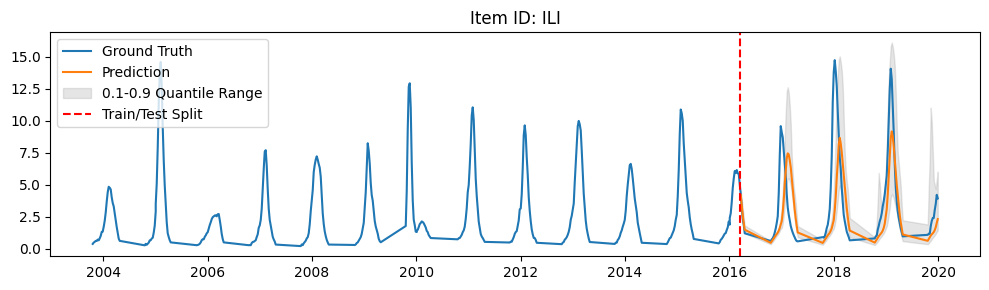

In [38]:
from tabpfn_time_series.plot import plot_pred_and_actual_ts

plot_pred_and_actual_ts(
    train=train_tsdf,
    test=test_tsdf_ground_truth,
    pred=pred,
)

In [39]:
pred.head()

target       0.1       0.2       0.3       0.4  \
item_id timestamp                                                      
ILI     2016-03-21  4.175323  3.819222  3.944303  4.039628  4.107780   
        2016-03-28  3.349715  2.886992  3.052874  3.168305  3.263773   
        2016-04-04  2.603711  2.210373  2.344682  2.440500  2.522166   
        2016-04-11  1.983190  1.638175  1.758526  1.841607  1.914557   
        2016-04-18  1.470503  1.203500  1.297497  1.362366  1.417404   

                         0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                     
ILI     2016-03-21  4.175323  4.245278  4.320120  4.409421  4.534451  
        2016-03-28  3.349715  3.438764  3.534965  3.653193  3.821829  
        2016-04-04  2.603711  2.686962  2.786491  2.926302  3.150207  
        2016-04-11  1.983190  2.058470  2.144866  2.257548  2.452078  
        2016-04-18  1.470503  1.526402  1.588618  1.670820  1.802367

In [40]:
# Extract ground truth values for the predicted dates
ground_truth = test_tsdf_ground_truth[test_tsdf_ground_truth.index.get_level_values('timestamp').isin(pred.index.get_level_values('timestamp'))]

# Compare predictions with ground truth
comparison = pd.DataFrame({
   'Predicted': pred['target'],
   'Actual': ground_truth['target']
})
print(comparison)

                    Predicted  Actual
item_id timestamp                    
ILI     2016-03-21   4.175323    4.23
        2016-03-28   3.349715    3.18
        2016-04-04   2.603711    2.30
        2016-04-11   1.983190    1.85
        2016-04-18   1.470503    1.19
...                       ...     ...
        2019-12-02   1.284454    2.39
        2019-12-09   1.441718    3.01
        2019-12-16   1.666791    3.49
        2019-12-23   2.004552    4.20
        2019-12-30   2.301135    3.92

[100 rows x 2 columns]


In [41]:
# Calculate various comparison metrics
def calculate_comparison_metrics(actual, predicted):
    # Basic error metrics
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100


    # Mean absolute scaled error (MASE)
    # Using naive forecast (previous value) as baseline
    naive_errors = np.abs(np.diff(actual))
    mae_naive = np.mean(naive_errors)
    mase = mae / mae_naive if mae_naive != 0 else np.nan

    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape,
        'MASE': mase
    }
    return metrics

# Calculate metrics
metrics = calculate_comparison_metrics(
    actual=comparison['Actual'],
    predicted=comparison['Predicted']
)

# Print metrics in a formatted way
print("\nForecast Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric:<15}: {value:,.4f}")




Forecast Evaluation Metrics:
MAE            : 2.2875
RMSE           : 3.3616
MAPE (%)       : 67.3702
MASE           : 2.8290
